![](https://img.freepik.com/free-vector/world-smile-day-banner-with-happy-face-balloons_1017-33641.jpg?w=2000)
***Happiness, is a great feelling, many factors can affect on it. In this notebook we will study those factors and their relation  with the happiness score.
Happy learning !!!!***
 

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print("the path of the studied data set is :", path)

the path of the studied data set is : /kaggle/input/world-happiness-based-on-cpi-20152020/WorldHappiness_Corruption_2015_2020.csv


**1. Data loading**

In [2]:
# we start by reading the csv file located in this path 
data = pd.read_csv(path)
# display the first five rows 
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [3]:
# you can use the set_option fct in order to show all rows and columns
pd.set_option('display.max_rows', data.shape[0]+1) 
data

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
5,Netherlands,7.3770,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Europe,2015,0.000000,84
6,Canada,7.3160,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,North America,2015,0.000000,83
7,New Zealand,7.3140,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia,2015,0.000000,91
8,Sweden,7.2840,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Europe,2015,0.000000,89
9,Australia,7.2840,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Australia,2015,0.000000,79


**2. Exploratory data analysis and cleaning**

In [4]:
# print the shape of the used data set 
print("the shape of WorldHappiness_Corruption_2015_2020 data set is : ", data.shape)

the shape of WorldHappiness_Corruption_2015_2020 data set is :  (792, 13)


In [5]:
# print the columns name 
d_columns = data.columns
print("The columns of the folowing data set are : ", "\n",d_columns)

The columns of the folowing data set are :  
 Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')


In [6]:
# check for empty cells 
# data.isnull().sum()
data.isna().sum()
# there is no missing values as mentioned on the challenge notebook that:"You might want to add that I filled missing data with 0's".

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [7]:
# we will see if the are duplicates and we will drop them 
data.drop_duplicates(inplace=True)
data.shape 

(792, 13)

In [8]:
# print the name of each column and its data type, count the non empty cells per column
data.info()
# we have two object columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 86.6+ KB


In [9]:
# calculate some statistic values for numerical columns
data.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


<AxesSubplot:>

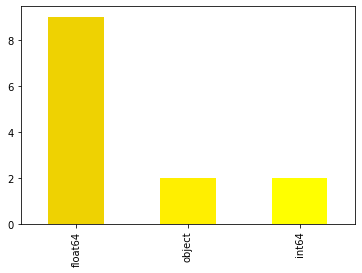

In [10]:
# visualize the total values using a bar plot
data.dtypes.value_counts().plot.bar(color =['#EED202','#FFEF00','#FFFF00'])

**3. Data visualisation**

In [11]:
# create tow list for numerical and categorical variables 
num_cols = ['gdp_per_capita', 'family', 'health','freedom', 'generosity', 'government_trust', 
          'dystopia_residual', 'social_support', 'cpi_score']
cat_cols = ['Country','continent', 'Year']

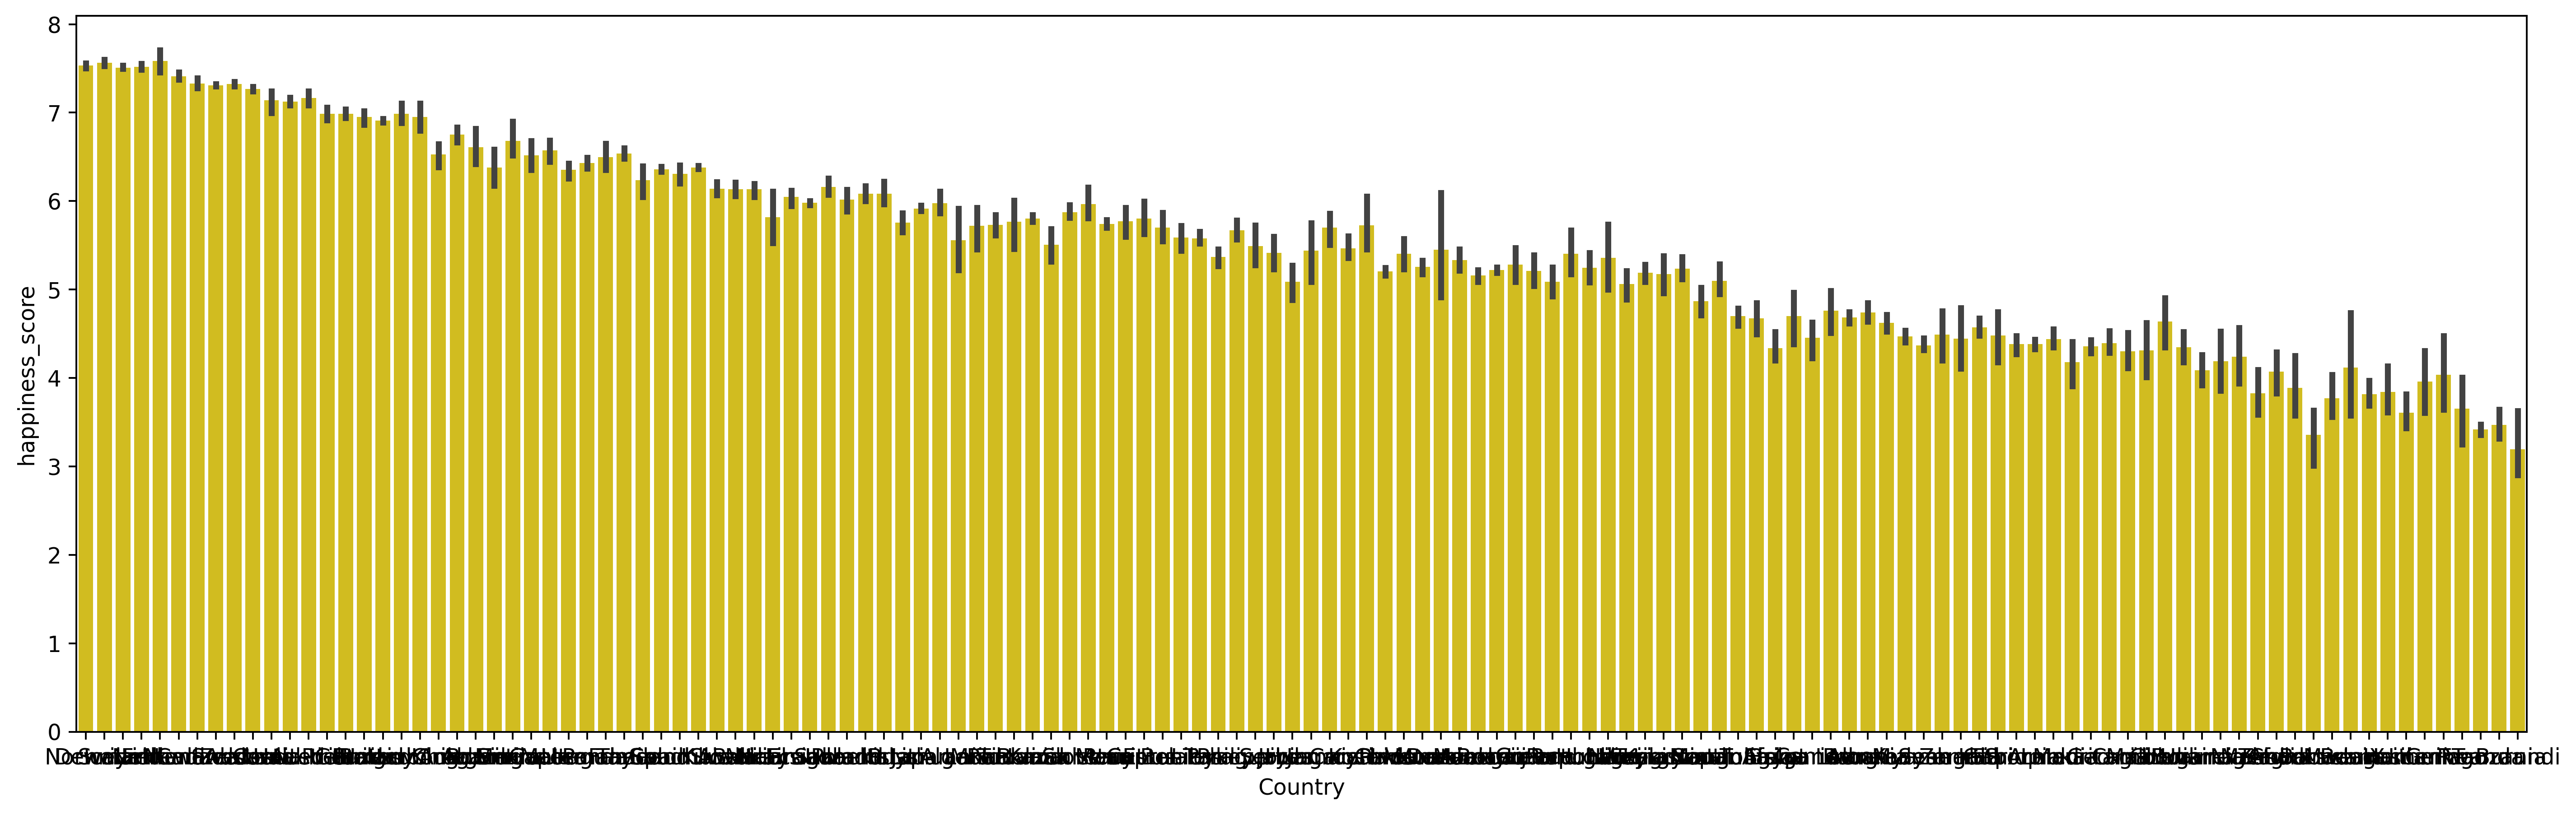

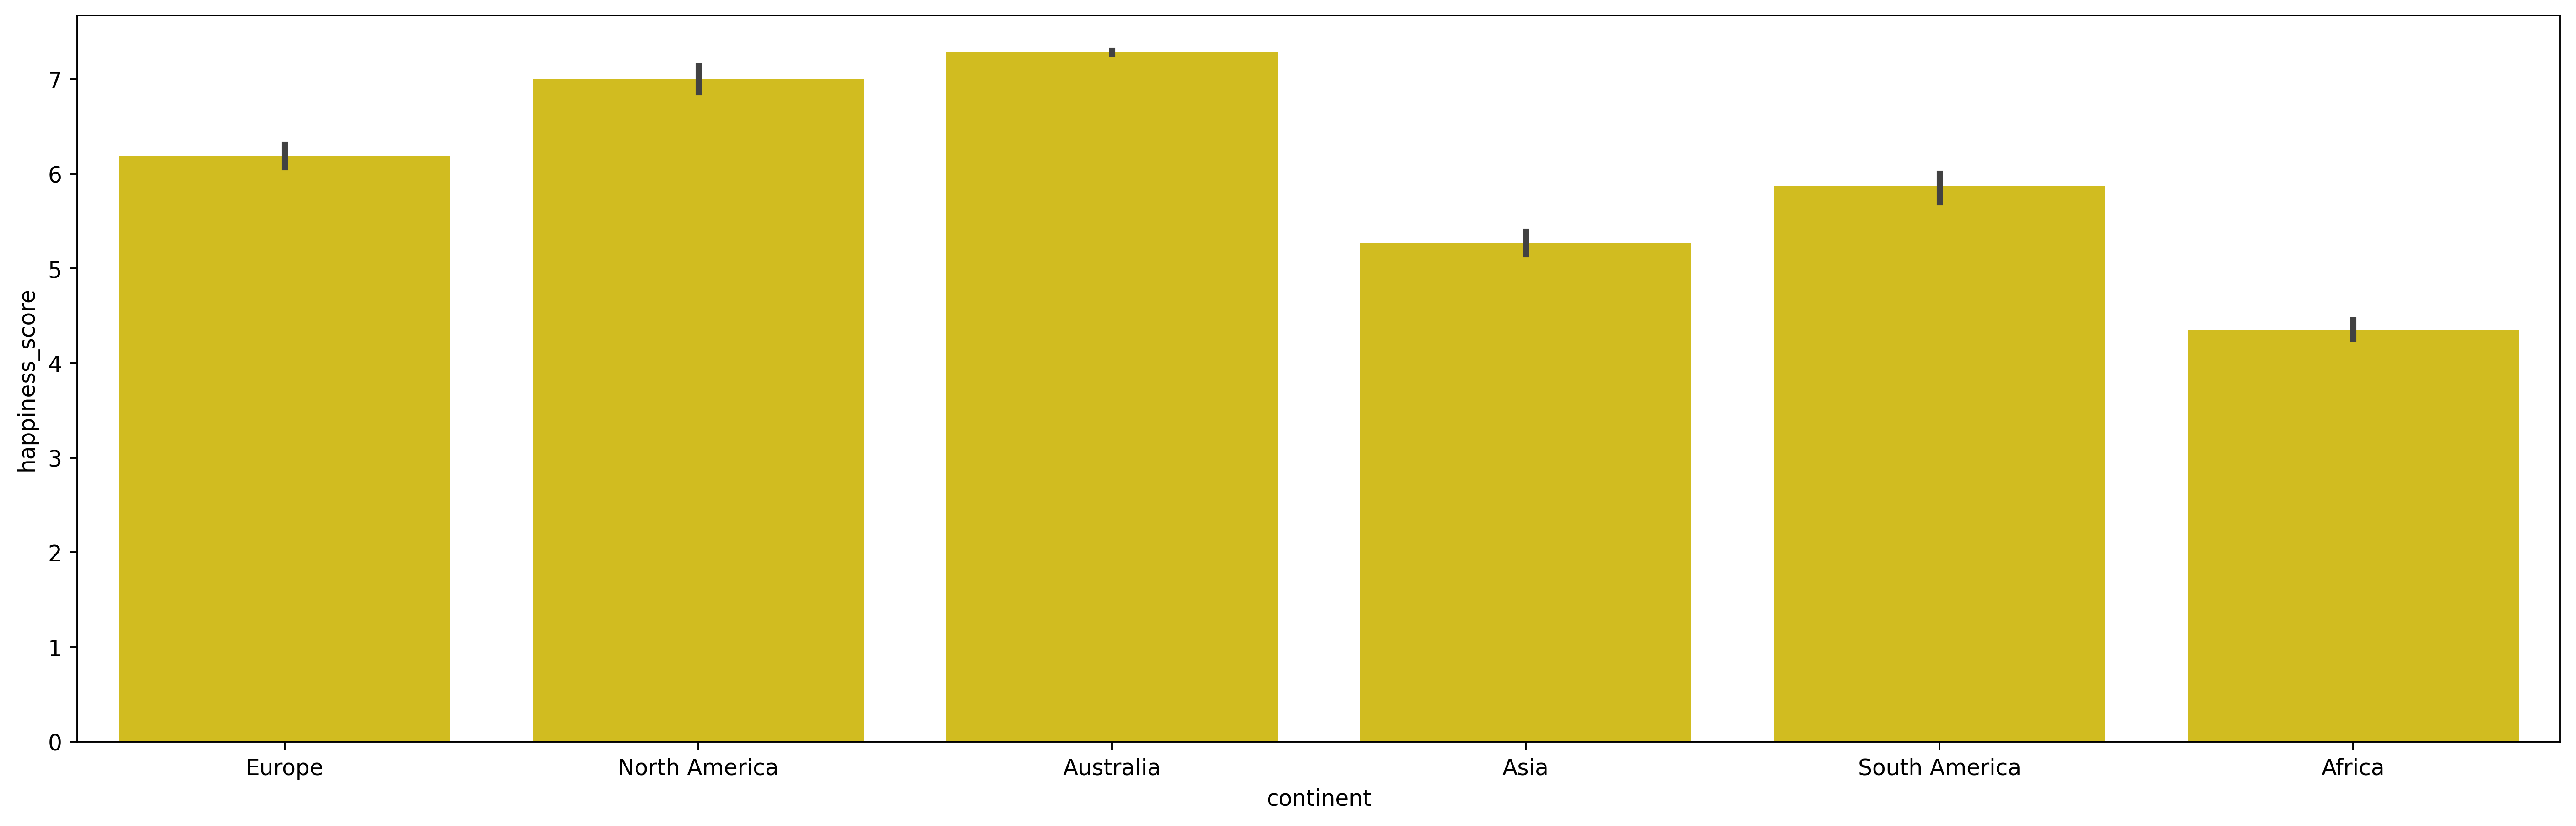

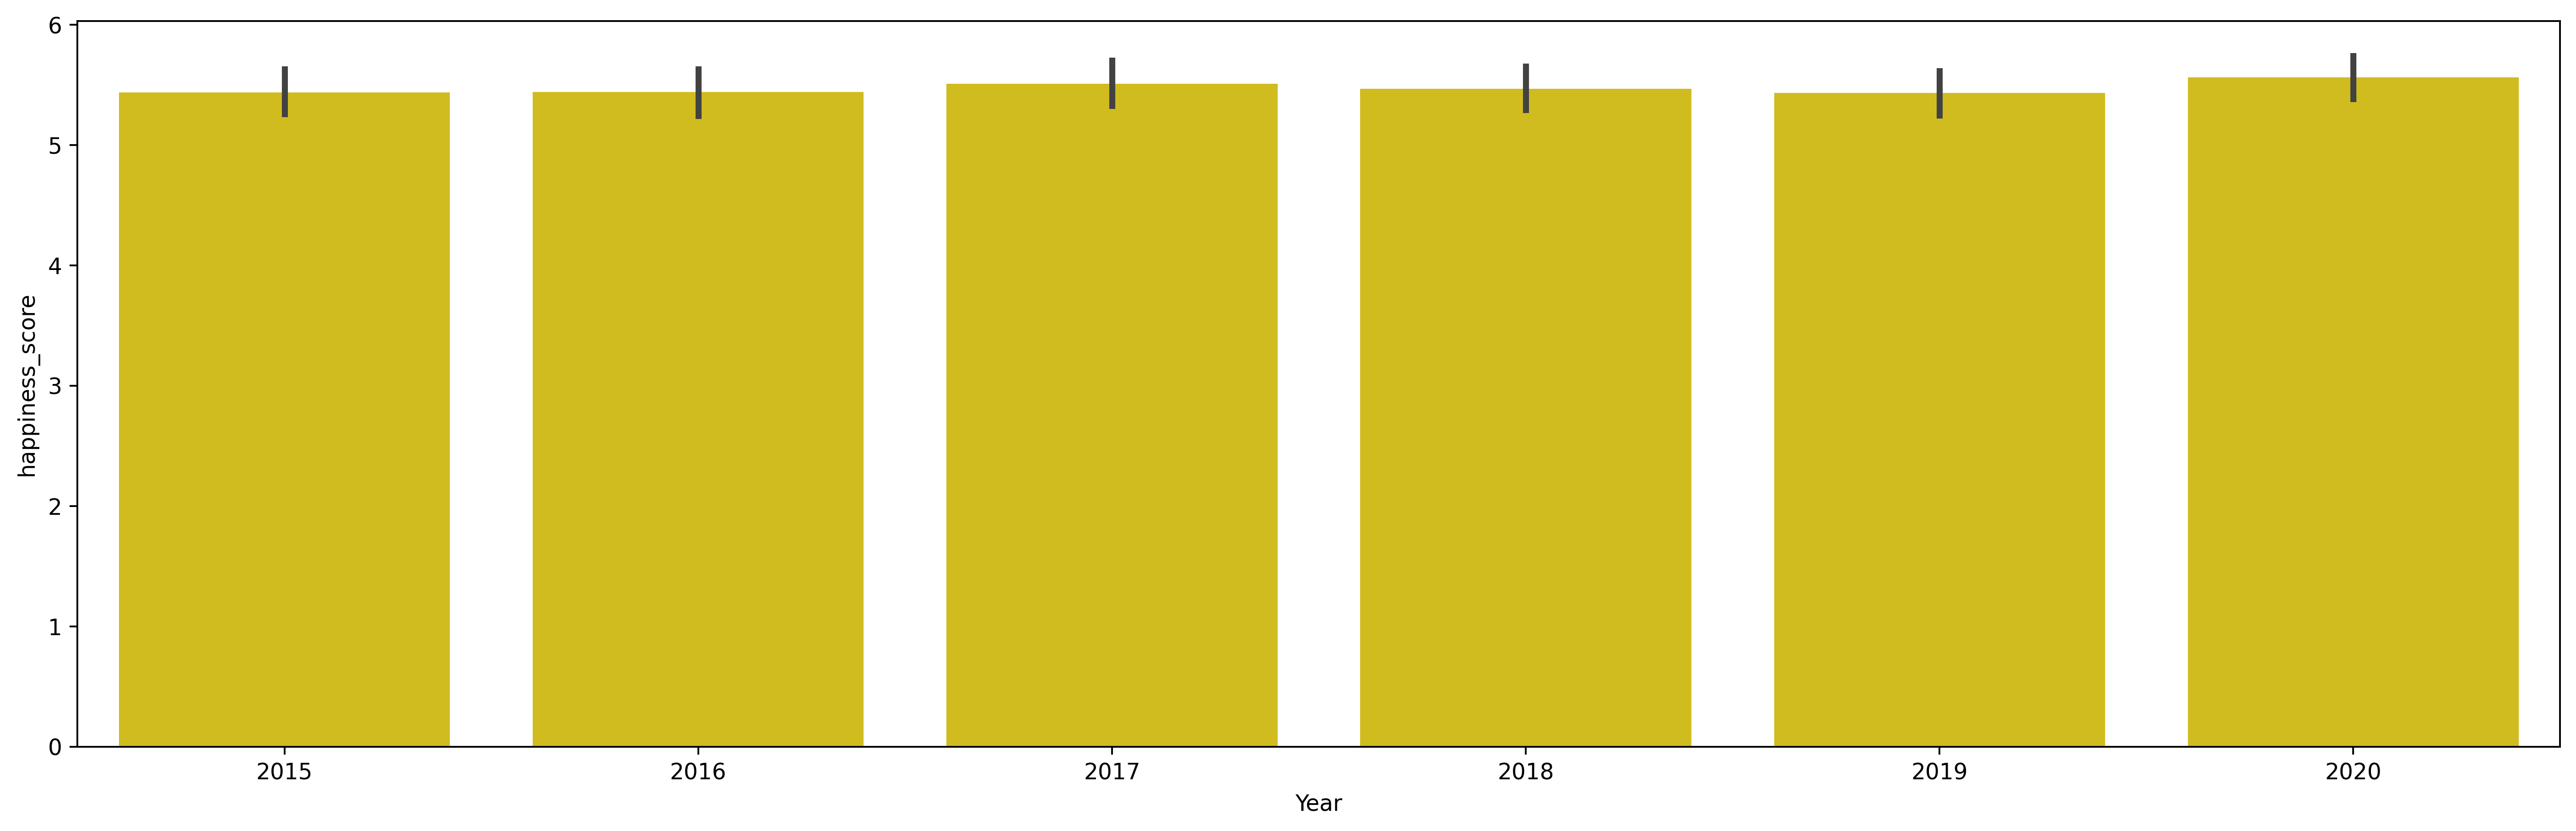

In [12]:
# Plot the categorical variables 
for col in cat_cols:
    plt.figure(figsize=(20,6), dpi = 350)
    sns.barplot(x=data[col], y=data['happiness_score'], color ='#EED202')

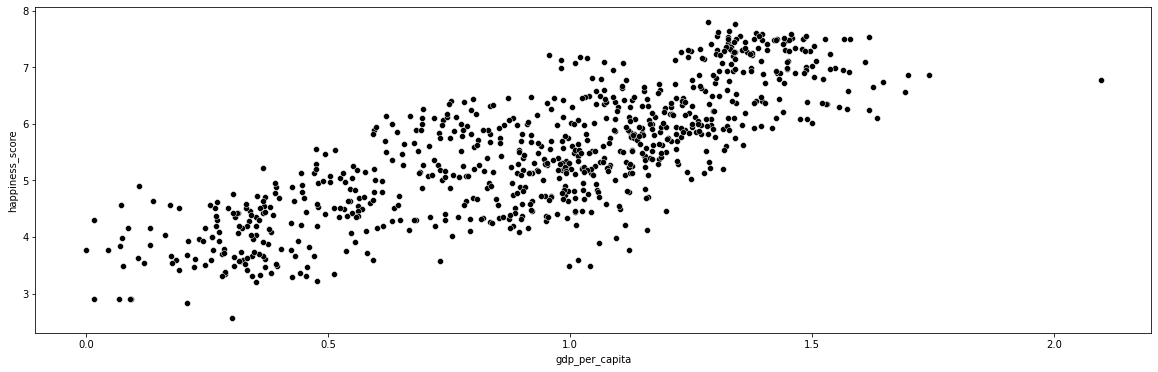

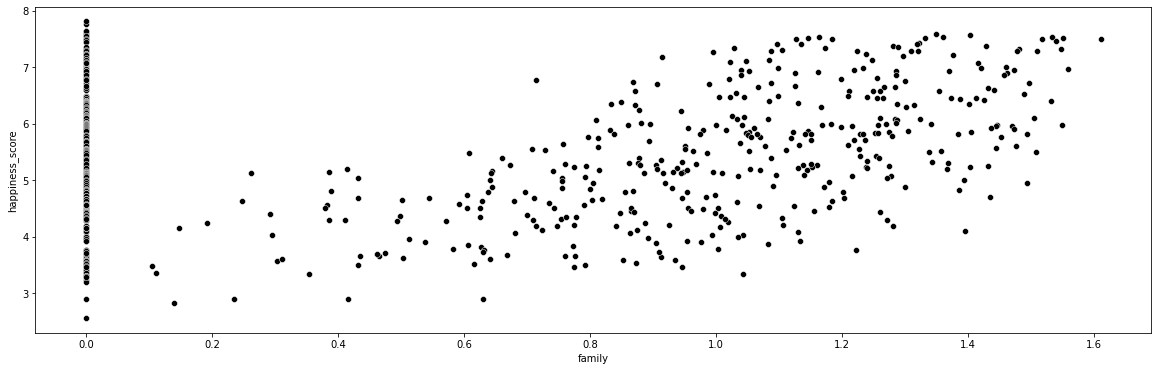

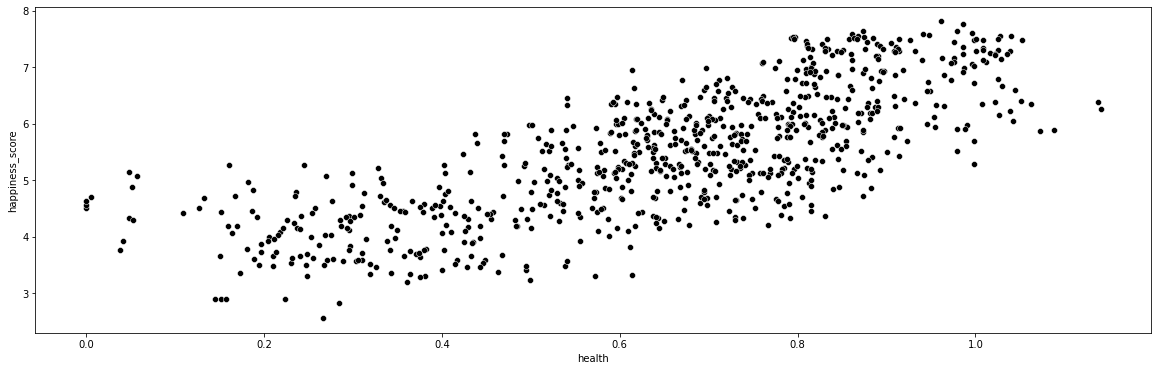

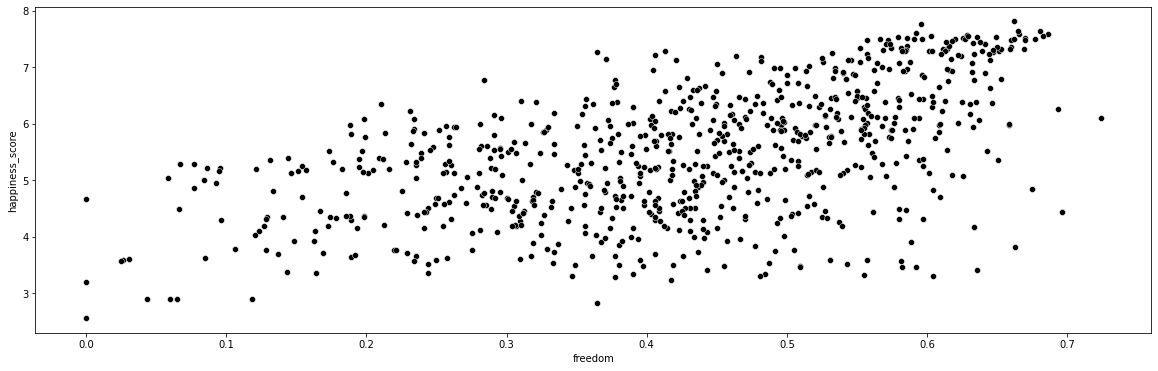

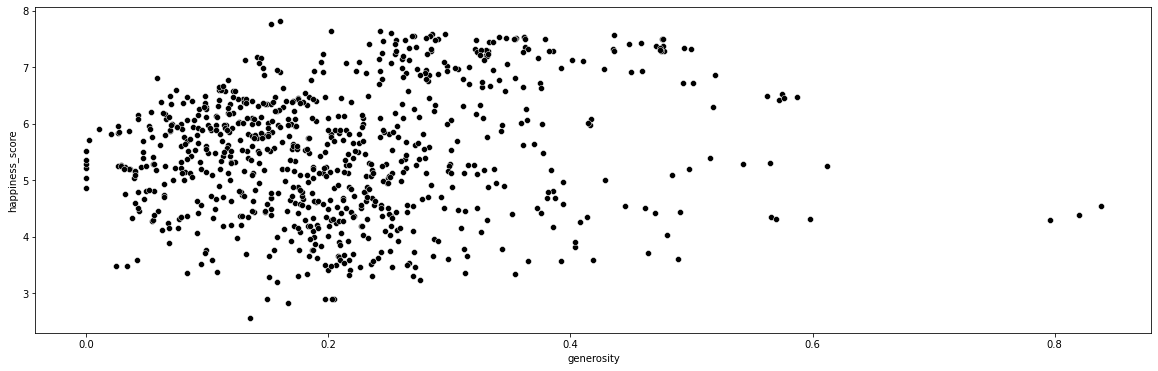

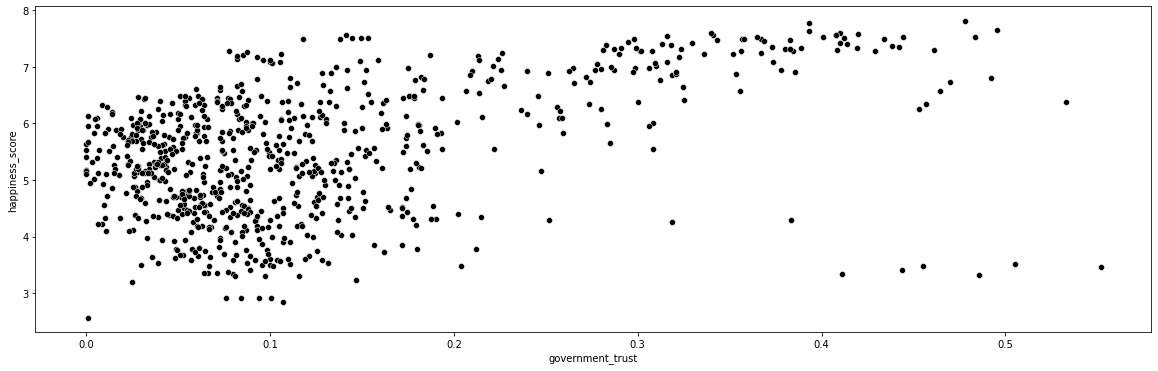

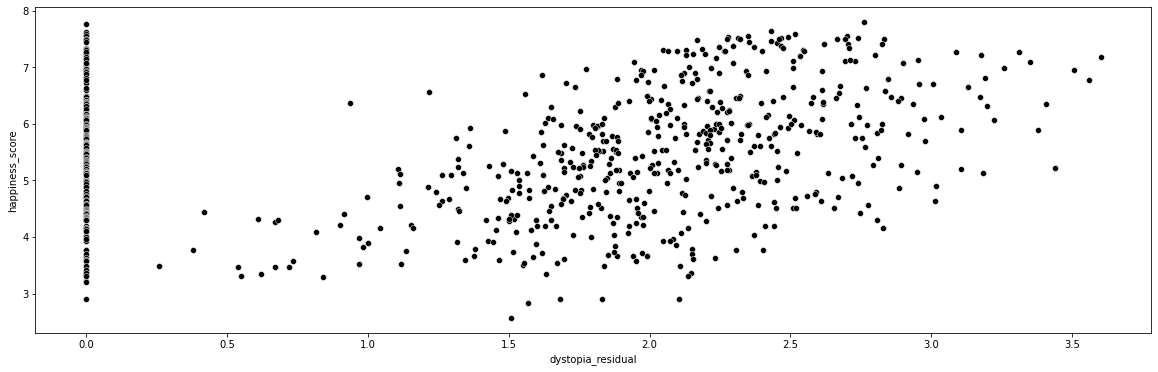

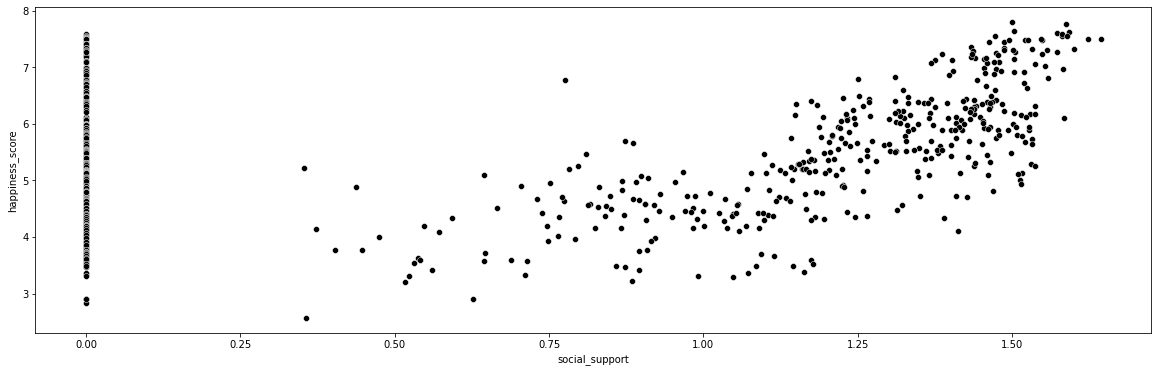

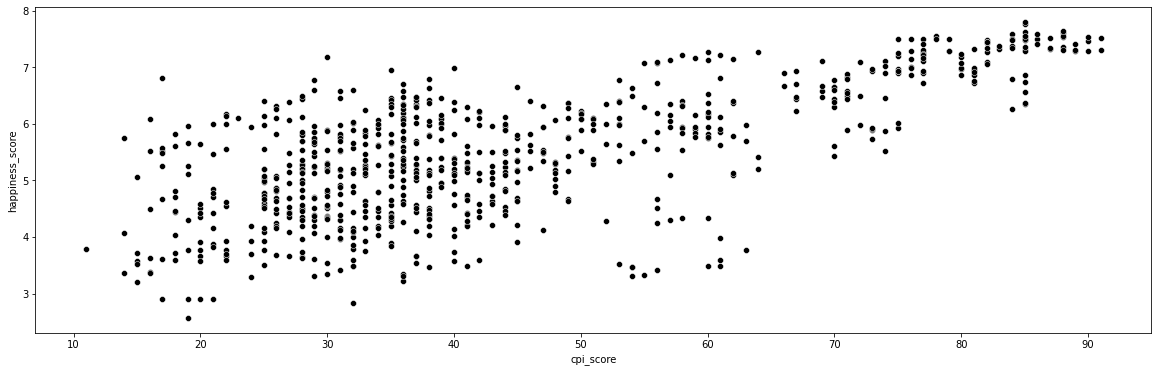

In [13]:
# Plot the numerical variables 
for col in num_cols:
    plt.figure(figsize=(20,6))
    sns.scatterplot(x=data[col], y=data['happiness_score'], color ='black')
   

**4. Relation between some factors and happiness_score variable**


**In this section we will use some plots from our Power BI report** 

* **Embed Power BI Report IN PYHTON**

In [14]:
# First we have to import the "IPython.display" library, which help us to embed the power bi report in our notebook 
# thus we will need to the "IFrame" package 
from IPython.display import IFrame

* **Create the link var** 

In [15]:
# then we have to create a variable with the link provided from powr bi server 
power_bi_rep = "https://app.powerbi.com/reportEmbed?reportId=7a651221-83d0-4b03-8f55-35651a190784&autoAuth=true&ctid=66388269-5aeb-49d5-982c-316964fec40f"

* **Show the report**

In [16]:
# we will use the IFrame function to show the report 
IFrame(power_bi_rep , width = 1200 , height = 600)

**5. Linear Regression Model**

In [17]:
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
# create x and y lists, we will keep only numerical columns 
x = data[['gdp_per_capita', 'family', 'health','freedom', 'generosity',
          'government_trust','dystopia_residual', 'Year', 'social_support', 'cpi_score']]
y = data['happiness_score']

# split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

In [19]:
# create the Linear Regression model and fit it 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
# make prediction 
pred = model.predict(x_test)
pred

array([5.59933917, 6.99269325, 6.97872247, 6.68435856, 5.55650309,
       6.25374139, 7.14964296, 4.05524893, 3.13095533, 5.86024937,
       5.7402126 , 6.65791038, 5.0554257 , 5.91477529, 7.04729299,
       5.66720637, 4.19373353, 6.12310524, 6.3181885 , 3.43207126,
       5.3234567 , 5.48734442, 4.17031591, 6.87328656, 5.82014734,
       6.16295057, 3.99063439, 5.43822809, 3.40818658, 6.48361698,
       4.06680829, 5.78981028, 5.42483856, 3.9373077 , 3.05718828,
       7.46307113, 5.60985681, 4.16738353, 6.97332543, 4.71577405,
       5.41782935, 3.48465774, 5.39539198, 5.39666345, 5.38575647,
       4.8356756 , 4.26930233, 7.41832514, 5.79968646, 5.12827135,
       5.60263546, 4.47654033, 4.64615778, 4.27874794, 3.5985205 ,
       6.30416095, 6.15252527, 5.31477319, 7.71932834, 4.95243116,
       5.03512047, 5.36075553, 5.24243401, 6.06094171, 6.08718103,
       5.69264521, 6.01461273, 5.94770639, 7.06663452, 6.66500841,
       7.68247704, 6.8953072 , 3.8844459 , 6.90342657, 7.16668

In [21]:
from sklearn.metrics import mean_absolute_error
# Calculate the mean absolute error 
score = mean_absolute_error(y_test, pred)
print('The mean absolute error is:', score)

The mean absolute error is: 0.371166114811483


In [22]:
# we calculate the accuracy of the model 
model.score(x_test, y_test)

0.816349855263788

* # I hope this will be helpfull, please leave an upvote !! #
* # Feel free to ask your questions on the comment section #
